# Add title

## Import libraries

In [1]:
import numpy as np
import plaidml.keras
import os
plaidml.keras.install_backend()
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

from keras import backend as K
print(K)

import keras
from keras.preprocessing.image import ImageDataGenerator

print("Keras version %s" %keras.__version__)

<module 'plaidml.keras.backend' from 'E:\\anaconda3\\envs\\plaidML\\lib\\site-packages\\plaidml\\keras\\backend.py'>
Keras version 2.2.4


## Load meta file (onset, offset, labels)

In [2]:
import pandas as pd
df = pd.read_csv('E:\\Xception\\TUT-SED-synthetic-2016\\meta.txt', delimiter = "\t", header=None)
df.columns = ["file", "drop1", "onset", "offset", "label", "drop2"]
# delete not useful columns
df = df.drop(columns=["drop1", "drop2"])

## Extract Features

In [3]:
# Load various imports 
import pandas as pd
import librosa.display
import librosa

directory = 'E:\\Xception\\TUT-SED-synthetic-2016\\audio\\'

features = []

# Iterate through each sound file and extract the features 
for i in range(100):
    
    if i%10==0:
        print("processing element ",i)
    
    file_name = directory+'TUT-SED-synthetic-2016-mix-'+str(i)+'.wav'
        
    # load single audio file
    audio, sr = librosa.load(file_name, res_type='kaiser_fast')
    
    #mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40, n_fft=440, hop_length=73, n_mels=40)
    #mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
    #mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_fft=1024, hop_length=882, n_mels=40)
    
    # extract mfcc features with 20ms frame and 50% overlap at 22050 Hz
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40, n_fft=440, hop_length=220, n_mels=40)
    
    # add extracted feature to features' list 
    features.append([mfccs])


processing element  0
processing element  10
processing element  20
processing element  30
processing element  40
processing element  50
processing element  60
processing element  70
processing element  80
processing element  90


## Data labelling

In [32]:
#labelling matrix creation, this is done due to poliphony of data

import numpy as np

num_classes = df['label'].nunique()
labels = []

# to transform literal label to a numerical value
label_switch = {"alarms_and_sirens" : 0,
                "baby_crying" : 1,
                "bird_singing" : 2,
                "bus" : 3,
                "cat_meowing" : 4,
                "crowd_applause" : 5,
                "crowd_cheering" : 6,
                "dog_barking" : 7,
                "footsteps" : 8,
                "glass_smash" : 9,
                "gun_shot" : 10,
                "horsewalk" : 11,
                "mixer" : 12,
                "motorcycle" : 13,
                "rain" : 14,
                "thunder" : 15,        
}

# iterate over each file and create labels based on meta file
for i in range(100):
    
    if i%10==0:
        print("processing element ",i)
        
    file_name = directory+'TUT-SED-synthetic-2016-mix-'+str(i)+'.wav'

    # initialize matrices with zeros
    num_frames = np.vstack(features[i]).shape[1]
    single_labels = np.zeros((num_classes, num_frames), dtype=int)

    # extract metadata of single audio file
    query_name = file_name[len('E:\\Xception\\TUT-SED-synthetic-2016\\audio\\'):]
    query_name = 'audio/' + query_name
    subdf = df.query('file==@query_name')
    
    # populate matrix based on meta file
    # more efficient to do it starting from metafile instead of iterating on the matrix since 
    # features are less than the matrix and there are more zeros than ones at the end of 
    # the process
    onset = np.array(subdf.loc[:, 'onset'])
    offset = np.array(subdf.loc[:, 'offset'])
    labeldf = np.array(subdf.loc[:, 'label'])
    
    """
    for j in range(onset.shape[0]):
        # metadata values are in seconds so transform in 10ms intervals
        start = int(onset[j]*100)
        end = int(offset[j]*100)
        # label based on start and end of the single audio
        for k in range(end-start):
            single_labels[label_switch[labeldf[j]]][k+start] = 1
    
    """
    for index, row in subdf.iterrows():
        # metadata values are in seconds so transform in 10ms intervals
        start = int(row['onset']*100)
        end = int(row['offset']*100)
        # label based on start and end of the single audio
        for k in range(end-start):
            single_labels[label_switch[row['label']]][k+start] = 1
           
    # add extracted labels to labels' list 
    labels.append([single_labels])


processing element  0
processing element  10
processing element  20
processing element  30
processing element  40
processing element  50
processing element  60
processing element  70
processing element  80
processing element  90


In [15]:
prova = np.array(labels[0])
for i in range(30000):
    print(prova[0][13][i])

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


## Create subvectors for each mixture

In [33]:
# create data structures to contain data
splitted_features = []
splitted_labels =[]

#length of splitted subvectors
length = 1024

# iterate on each audio file
for i in range(100):
    
    if i%10==0:
        print("processing element ",i)
    
    # extract working features and labels for current element
    working_f = np.vstack(features[i])
    working_l = np.vstack(labels[i])
    
    # iterate for all the possible subsequencies
    for j in range(int(working_f.shape[1]/length)+1):
        
        # subdivide in 1024 elements vectors
        feat = working_f[:,j*length:(j+1)*length]
        lab = working_l[:,j*length:(j+1)*length]
        
        # last vector need padding
        if feat.shape[1] != length:
            feat = np.pad(feat, pad_width=((0, 0), (0, length-feat.shape[1])), mode='constant')
            lab = np.pad(lab, pad_width=((0, 0), (0, length-lab.shape[1])), mode='constant')
        
        # add new splitted vectors to new lists
        splitted_features.append(feat)
        splitted_labels.append(lab)


processing element  0
processing element  10
processing element  20
processing element  30
processing element  40
processing element  50
processing element  60
processing element  70
processing element  80
processing element  90


## Create dataframe to manipulate features and labels

In [ ]:
splitted_features = features

In [34]:
# create empty data frame in pandas
dataframe = pd.DataFrame()

# add features
dataframe['feature']  = splitted_features

# add labels
dataframe['class_label']  = splitted_labels

print('Total dataset contains', len(dataframe), ' files')

Total dataset contains 3376  files


## Save processed data to pickle file

In [18]:
dataframe.to_pickle('E:\\Xception\\TUT-SED-synthetic-2016\\processed_data_frame.pkl')

## Delete unused variable to save RAM

In [ ]:
reset_selective -f features
reset_selective -f labels
reset_selective -f splitted_features
reset_selective -f splitted_labels

## Load processed data from pickle file

In [ ]:
import pandas as pd
dataframe = pd.read_pickle('E:\\Xception\\TUT-SED-synthetic-2016\\processed_data_frame.pkl')

## Preprocess data to input the network 

In [35]:
#from sklearn.preprocessing import LabelEncoder
#from keras.utils import to_categorical

# Convert features and corresponding classification labels into numpy arrays
X = np.array(dataframe.feature.tolist())
y = np.array(dataframe.class_label.tolist())

# no need to encode labels since they are already in form of one hot encode

# delete dataframe to save memory
#reset_selective -f dataframe

# split the dataset 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# delete X to save memory
#reset_selective -f X

## Model definition

In [36]:
from keras.models import Model
from keras.layers import SeparableConv2D, ZeroPadding2D, Activation, Dropout, Dense, \
                            Conv2D, MaxPooling2D, Reshape
from keras.layers.normalization import BatchNormalization
from keras import Input, optimizers

num_rows = X.shape[1]
num_columns = X.shape[2]
num_channels = 1

x_train = x_train.reshape(x_train.shape[0], num_columns, num_rows, num_channels)
x_test = x_test.reshape(x_test.shape[0], num_columns, num_rows, num_channels)

num_labels = y.shape[1]
#num_labels = 16

def Net(dilated_kernel, dilation, dilated_padding):
    
    # input layer
    inputs = Input(shape=(num_columns, num_rows, num_channels))
    
    # DWS-CNN layer 1
    x = ZeroPadding2D(padding=(2))(inputs)
    # use valid padding since padding is introduced before due to its special form (maybe it's equal to use same padding?)
    x = SeparableConv2D(256,kernel_size=(5,5), strides=(1,1), padding='valid')(x)
    x = Activation('relu')(x)
    # Batch Normalisation before passing it to the next layer
    x = BatchNormalization()(x)
    # Pooling
    x = MaxPooling2D(pool_size=(1,5), strides=(1,5), padding='valid')(x)
    # Dropout
    x = Dropout(0.25)(x)
    
    # DWS-CNN layer 2
    x = ZeroPadding2D(padding=(2))(x)
    # use valid padding since padding is introduced before due to its special form
    x = SeparableConv2D(256,kernel_size=(5,5), strides=(1,1), padding='valid')(x)
    x = Activation('relu')(x)
    # Batch Normalisation before passing it to the next layer
    x = BatchNormalization()(x)
    # Pooling
    x = MaxPooling2D(pool_size=(1,4), strides=(1,4), padding='valid')(x)
    # Dropout
    x = Dropout(0.25)(x)
    
    # DWS-CNN layer 3
    x = ZeroPadding2D(padding=(2))(x)
    # use valid padding since padding is introduced before due to its special form
    x = SeparableConv2D(256,kernel_size=(5,5), strides=(1,1), padding='valid')(x)
    x = Activation('relu')(x)
    # Batch Normalisation before passing it to the next layer
    x = BatchNormalization()(x)
    # Pooling
    x = MaxPooling2D(pool_size=(1,2), strides=(1,2), padding='valid')(x)
    # Dropout
    x = Dropout(0.25)(x)
    
    # DIL-CNN 
    x = ZeroPadding2D(padding=(dilated_padding*dilation, 1))(x)
    x = Conv2D(256, kernel_size=dilated_kernel, dilation_rate=(dilation, 1))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Reshape((1024, 256))(x)
    
    # classifier layer
    outputs = Dense(num_labels,activation='sigmoid')(x)
    
    
    # model compilation for training
    adam = optimizers.Adam(lr=0.0001)
    model = Model(inputs, outputs)                            
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=["binary_accuracy"])
    
    return model


# create the model
dilated_kernel = (3,3)
dilation = 10
dilated_padding = 1
model = Net(dilated_kernel,dilation,dilated_padding)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 1024, 40, 1)       0         
_________________________________________________________________
zero_padding2d_13 (ZeroPaddi (None, 1028, 44, 1)       0         
_________________________________________________________________
separable_conv2d_10 (Separab (None, 1024, 40, 256)     537       
_________________________________________________________________
activation_13 (Activation)   (None, 1024, 40, 256)     0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 1024, 40, 256)     1024      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 1024, 8, 256)      0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 1024, 8, 256)      0         
__________

## Train the model (to be checked)

In [37]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from datetime import datetime 

num_epochs = 10
# low batch size due to memory maximum dimension, modify if using smaller dataset
num_batch_size = 8

callbacks = [ModelCheckpoint(filepath='E:\\Xception\\TUT-SED-synthetic-2016\\model-{val_binary_accuracy:.2f}.h5', 
                               verbose=1, save_best_only=True, monitor="val_binary_accuracy")]#,
                #EarlyStopping(monitor='val_binary_accuracy', patience=5)]

start = datetime.now()

y_train = y_train.reshape(y_train.shape[0], 1024, 16)
y_test = y_test.reshape(y_test.shape[0], 1024, 16)

history = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_split=0.16, verbose=1, callbacks=callbacks)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Train on 2268 samples, validate on 432 samples
Epoch 1/10
2268/2268 [==============================] - 152s 67ms/step - loss: 3.2863 - binary_accuracy: 0.7604 - val_loss: 3.1893 - val_binary_accuracy: 0.9014

Epoch 00001: val_binary_accuracy improved from -inf to 0.90139, saving model to E:\Xception\TUT-SED-synthetic-2016\model-0.90.h5
Epoch 2/10
2268/2268 [==============================] - 41s 18ms/step - loss: 3.2816 - binary_accuracy: 0.8070 - val_loss: 3.1892 - val_binary_accuracy: 0.8757

Epoch 00002: val_binary_accuracy did not improve from 0.90139
Epoch 3/10
2268/2268 [==============================] - 40s 18ms/step - loss: 3.2813 - binary_accuracy: 0.8238 - val_loss: 3.1892 - val_binary_accuracy: 0.8694

Epoch 00003: val_binary_accuracy did not improve from 0.90139
Epoch 4/10
2268/2268 [==============================] - 40s 17ms/step - loss: 3.2813 - binary_accuracy: 0.8356 - val_loss: 3.1892 - val_binary_accuracy: 0.8712

Epoch 00004: val_binary_accuracy did not improve from 0

## Evaluate model

In [38]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=num_batch_size)
print("test loss, test acc:", results)

Evaluate on test data
676/676 [==============================] - 13s 20ms/step
test loss, test acc: [3.2054153532671505, 0.8712452544263128]


## Save model

In [93]:
filename = 'E:\\Xception\\TUT-SED-synthetic-2016\\10epochs.h5'
model.save(filename)

## Plot Results

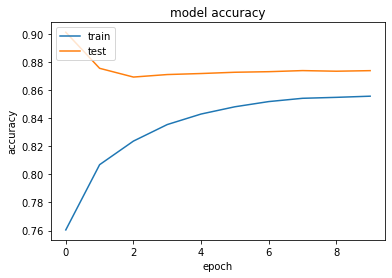

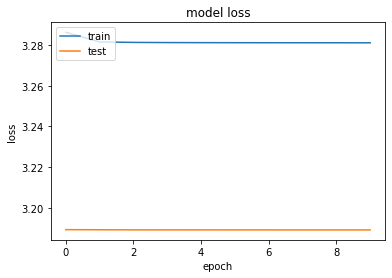

In [39]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Compute other metrics (to be checked)

In [17]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test, batch_size=2, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

y_pred.shape
y_pred_bool.shape 
print(classification_report(y_test, y_pred_bool))

676/676 [==============================] - 2s 3ms/step


(676, 16)

In [25]:
from sklearn.metrics import f1_score

y_pred




array([[[0.99999547, 0.9999958 , 0.9999862 , ..., 1.        ,
         1.        , 1.        ],
        [0.99992   , 0.9998913 , 0.999806  , ..., 0.9999958 ,
         0.99999905, 0.9999987 ],
        [0.99999976, 0.99999976, 0.9999994 , ..., 0.99999845,
         0.9999981 , 0.9999976 ],
        ...,
        [0.44849777, 0.4476615 , 0.44755006, ..., 0.451956  ,
         0.45059073, 0.4508514 ],
        [0.43145683, 0.43177563, 0.43198833, ..., 0.42924088,
         0.4268031 , 0.4275195 ],
        [0.42601314, 0.4258692 , 0.4261842 , ..., 0.42171848,
         0.42001548, 0.42055082]],

       [[0.99999964, 0.9999994 , 0.99999857, ..., 1.        ,
         1.        , 1.        ],
        [1.        , 0.9999999 , 1.        , ..., 1.        ,
         1.        , 1.        ],
        [0.9999999 , 0.9999999 , 0.9999999 , ..., 0.99999917,
         0.99999976, 0.9999995 ],
        ...,
        [0.4418901 , 0.44174635, 0.44246802, ..., 0.44049448,
         0.43926147, 0.43933335],
        [0.4

In [40]:
TP = 0
FP = 0
TN = 0
FN = 0

y_pred = model.predict(x_test, batch_size=8, verbose=1)

for i in range(y_test.shape[0]):
    if i%100 == 0:
        print("processing element ", i)
    for j in range(y_test.shape[1]):
        for k in range(y_test.shape[2]):
            
            test = y_test[i][j][k]
            pred = y_pred[i][j][k]
            
            # binarization of predicted output
            if(pred > 0.5):
                pred = 1
            else:
                pred = 0

            if(test == 1 and pred == 1):
                TP = TP + 1
            elif(test == 0 and pred == 1):
                FP = FP + 1
            elif(test == 0 and pred == 0):
                TN = TN + 1
            elif(test == 1 and pred == 0):
                FN = FN + 1
                
recall = TP/(TP+FN)

precision = TP/(TP+FP)

f1_score = 2*recall*precision/(recall+precision)

print("recall: ", recall)
print("precision: ", precision)
print("f1: ", f1_score)


676/676 [==============================] - 19s 27ms/step
processing element  0
processing element  100
processing element  200
processing element  300
processing element  400
processing element  500
processing element  600
recall:  0.11028209985455163
precision:  0.11000992192096368
f1:  0.11014584274542791


In [30]:
for i in range(1024):
    print(y_test[2][i])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0

In [47]:
for i in range(1024):
    print(y[0][13][i])

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [32]:
y.shape

(3376, 16, 1024)

In [38]:
subdf.loc[:, 'onset'].shape

(485,)

In [49]:
import pkgutil
list(pkgutil.iter_modules())


[ModuleInfo(module_finder=FileFinder('E:\\Xception'), name='mel_spectrogram_daniele', ispkg=False),
 ModuleInfo(module_finder=FileFinder('E:\\anaconda3\\envs\\plaidML\\DLLs'), name='_asyncio', ispkg=False),
 ModuleInfo(module_finder=FileFinder('E:\\anaconda3\\envs\\plaidML\\DLLs'), name='_bz2', ispkg=False),
 ModuleInfo(module_finder=FileFinder('E:\\anaconda3\\envs\\plaidML\\DLLs'), name='_ctypes', ispkg=False),
 ModuleInfo(module_finder=FileFinder('E:\\anaconda3\\envs\\plaidML\\DLLs'), name='_ctypes_test', ispkg=False),
 ModuleInfo(module_finder=FileFinder('E:\\anaconda3\\envs\\plaidML\\DLLs'), name='_decimal', ispkg=False),
 ModuleInfo(module_finder=FileFinder('E:\\anaconda3\\envs\\plaidML\\DLLs'), name='_elementtree', ispkg=False),
 ModuleInfo(module_finder=FileFinder('E:\\anaconda3\\envs\\plaidML\\DLLs'), name='_hashlib', ispkg=False),
 ModuleInfo(module_finder=FileFinder('E:\\anaconda3\\envs\\plaidML\\DLLs'), name='_lzma', ispkg=False),
 ModuleInfo(module_finder=FileFinder('E:\\an